Curso Especialización en Intelixencia Artificial e Big Data

Sistemas de Aprendizaxe Automático

IES de Teis - Vigo

Prueba práctica UD2: Aprendizaje supervisado

**Nombre:**


En esta prueba se plantea un supuesto práctico como los que se han trabajado durante la UD2. Se proporciona un dataset con datos clasificados y una serie de cuestiones que deben abordarse.

Al finalizar la prueba se debe subir el notebook a la tarea del aula virtual.

Descripción del Dataset:

Se trata de un caso de clasificación binaria en la que se pretende predecir a partir de las siguientes variables si el cliente va o comprar un coche o no.

UserID: numérico (entero)

Gender(género): categórico

Age (edad): numérico 

Annual Salary: numérico 


Variable a predecir:

Purchased (¿Comprado?): (No=0, Sí=1)

El dataset se encuentra en el fichero *cars_data.csv*

## 1.Importación de paquetes y dataset

Importa aquí todos los paquetes que utilices 

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC  #Linear Support Vector Classification

Importa el dataset

In [2]:
# Cargar los datos de entrenamiento y prueba
df_train = pd.read_csv('car_data.csv')

## 2. EDA y visual EDA (0.75 pts)

 Analiza los datos numéricos, ¿Hay outliers o datos anómalos?



In [70]:
# Descripción de los datos de entrenamiento
print("Descripción del conjunto de datos de entrenamiento:")
print(df_train.describe())

Descripción del conjunto de datos de entrenamiento:
           User ID          Age   AnnualSalary    Purchased
count  1000.000000  1000.000000    1000.000000  1000.000000
mean    500.500000    40.106000   72689.000000     0.402000
std     288.819436    10.707073   34488.341867     0.490547
min       1.000000    18.000000   15000.000000     0.000000
25%     250.750000    32.000000   46375.000000     0.000000
50%     500.500000    40.000000   72000.000000     0.000000
75%     750.250000    48.000000   90000.000000     1.000000
max    1000.000000    63.000000  152500.000000     1.000000


In [71]:
# Consulta para verificar los valores nulos en df_train
print("Valores nulos en df_train:")
print(df_train.isnull().sum())

Valores nulos en df_train:
User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64


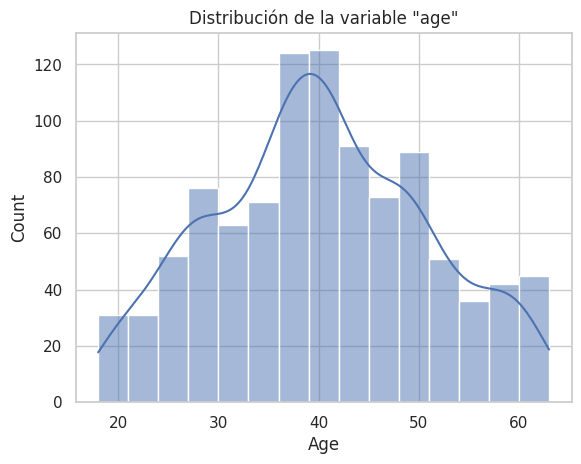

In [72]:
# Visualización de la distribución de la variable "age"
sns.histplot(data=df_train, x='Age', kde=True)
plt.title('Distribución de la variable "age"')
plt.show()

Visualiza las relaciones entre las variables independientes y comentalas. ¿Hay alguna relación entre el género y la decisión de compra? ¿Y del resto de variables con la decisión de compra? ¿Es un dataset balanceado?. Verifica visualmente si hay outliers. Justifica las respuestas.

<Figure size 1000x800 with 0 Axes>

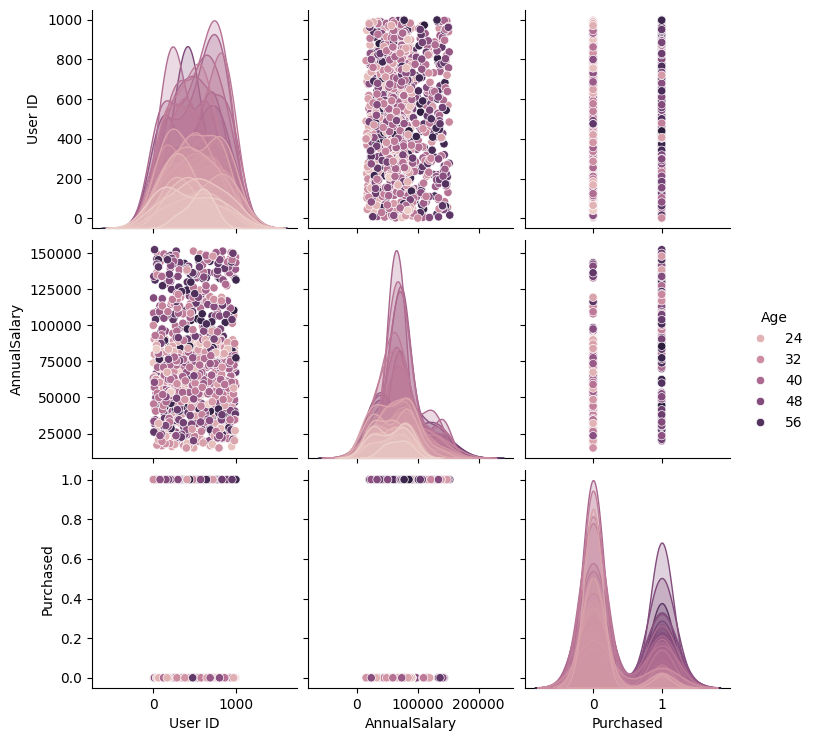

In [10]:
# Visualización de relaciones entre variables
plt.figure(figsize=(10, 8))
sns.pairplot(df_train[['User ID','Gender','Age','AnnualSalary','Purchased']], hue='Age', diag_kind='kde')
plt.show()

<Figure size 1000x800 with 0 Axes>

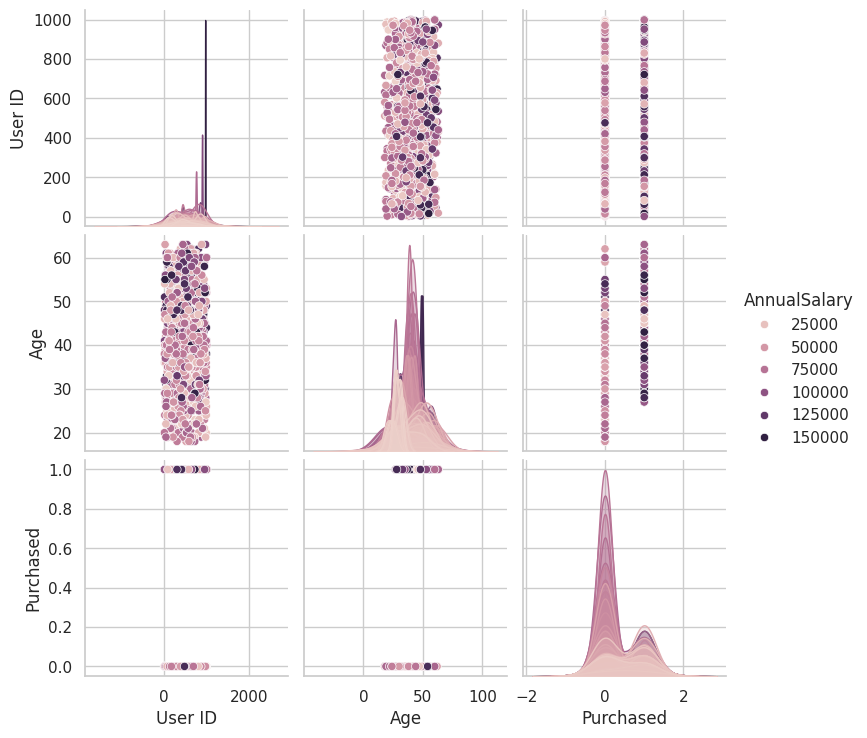

In [74]:
# Visualización de relaciones entre variables
plt.figure(figsize=(10, 8))
sns.pairplot(df_train[['User ID','Gender','Age','AnnualSalary','Purchased']], hue='AnnualSalary', diag_kind='kde')
plt.show()

In [73]:
# Ver las primeras filas del DataFrame df_train
print("Primeras filas del DataFrame df_train:")
print(df_train.head())


# Obtener un resumen estadístico del DataFrame df_train
print("\nResumen estadístico del DataFrame df_train:")
print(df_train.describe())


# Ver la cantidad de filas y columnas en el DataFrame df_train
print("\nDimensiones del DataFrame df_train:", df_train.shape)


Primeras filas del DataFrame df_train:
   User ID Gender  Age  AnnualSalary  Purchased
0      385   Male   35         20000          0
1      681   Male   40         43500          0
2      353   Male   49         74000          0
3      895   Male   40        107500          1
4      661   Male   25         79000          0

Resumen estadístico del DataFrame df_train:
           User ID          Age   AnnualSalary    Purchased
count  1000.000000  1000.000000    1000.000000  1000.000000
mean    500.500000    40.106000   72689.000000     0.402000
std     288.819436    10.707073   34488.341867     0.490547
min       1.000000    18.000000   15000.000000     0.000000
25%     250.750000    32.000000   46375.000000     0.000000
50%     500.500000    40.000000   72000.000000     0.000000
75%     750.250000    48.000000   90000.000000     1.000000
max    1000.000000    63.000000  152500.000000     1.000000

Dimensiones del DataFrame df_train: (1000, 5)


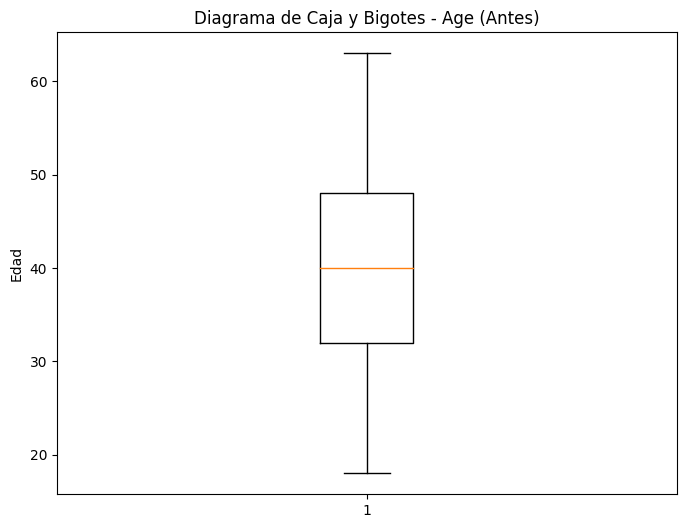

In [14]:
# Grafico diagrama de caja y bigotes para la columna 'age' antes de sustituir valores atípicos
plt.figure(figsize=(8,6))
plt.boxplot(df_train['Age'])
plt.title('Diagrama de Caja y Bigotes - Age (Antes)')
plt.ylabel('Edad')
plt.show()


#### Conjunto de datos de prueba:
- Los datos del conjunto de prueba tienen características similares en términos de distribución a los del conjunto de entrenamiento, con valores promedio y desviaciones estándar cercanas.
- Las variables muestran una amplia gama de valores, lo que indica que hay diversidad en los datos.
- No hay datos faltantes en ninguno de los conjuntos de datos, ya que el recuento de todas las variables es igual al número total de filas.

## 3.- Preprocessing (0,25 pts)

Realiza el procesado de los datos que creas oportuno antes de realizar el entrenamiento. Justifica los pasos realizados.

In [80]:
# Función para identificar y sustituir valores atípicos utilizando el método de los cuantiles más convenientes
def sustituir_valores_atipicos(df, columna):
    q1 = df[columna].quantile(0.25)
    q3 = df[columna].quantile(0.75)
    
    # Calcular el rango intercuartílico
    iqr = q3 - q1
    
    # Definir los límites para identificar valores atípicos
    limite_inferior = q1 - 1.5 * iqr
    limite_superior = q3 + 1.5 * iqr
    
    # Sustituir valores atípicos con los cuartiles más convenientes
    df[columna] = df[columna].apply(lambda x: q1 if x < limite_inferior else q3 if x > limite_superior else x)
    
    return df

In [81]:
#Transformación de datos categóricos con get_dummies
df_dummies = pd.get_dummies(data=df_train)
df_dummies = pd.get_dummies(data=df_train)

In [82]:
# Identificar las columnas categóricas
categorical_cols_train = df_train.select_dtypes(include=['object']).columns.tolist()

# Aplicar codificación one-hot a las columnas categóricas
encoder = OneHotEncoder(drop='first')
encoded_train = encoder.fit_transform(df_train[categorical_cols_train])

# Verificar las formas de los datos codificados
print("Forma de los datos codificados de entrenamiento:", encoded_train.shape)

Forma de los datos codificados de entrenamiento: (1000, 1)


In [83]:

# Obtener columnas categóricas
columnas_categoricas = df_train.select_dtypes(include=['object']).columns.tolist()

# Inicializar el codificador one-hot
encoder = OneHotEncoder(drop='first')

# Aplicar codificación one-hot a las columnas categóricas
df_train_encoded = pd.DataFrame(encoder.fit_transform(df_train[columnas_categoricas]).toarray())

# Obtener los nombres de las columnas codificadas
encoded_columns = encoder.get_feature_names_out(columnas_categoricas)

# Asignar nombres a las columnas codificadas
df_train_encoded.columns = encoded_columns

# Mostrar las primeras filas del DataFrame codificado
df_train_encoded.head()


,Gender_Male
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


## 4.División del dataset

Divide el dataset para entrenar los modelos y poder obtener las métricas de la clasificación.

In [84]:
from sklearn.model_selection import train_test_split
X = df_dummies.drop('Purchased',axis=1)
y = df_dummies['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2024)

In [85]:
print("Training set shape",X_train.shape)
print("Test set shape",X_test.shape)

Training set shape (700, 5)
Test set shape (300, 5)


##  5.- Regresión logística (0.25 pts)

In [86]:
clf1 = LogisticRegression(penalty='l2')

5.1. Clasificador y entrenamineto

 Entrena un clasificador de regresión logística

In [87]:
clf1.fit(X_train,y_train)

LogisticRegression()

5.2. Informe de clasificación

In [92]:
#Cálculo de intercept, coefficients y score

clf1.intercept_

array([-0.00097374])

In [93]:
clf1.coef_

array([[-1.58559835e-03,  8.40321652e-03,  4.05052695e-06,
        -3.45241615e-04, -6.28496749e-04]])

In [96]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, clf1.predict(X_test)))
print(confusion_matrix(y_test, clf1.predict(X_test)))

              precision    recall  f1-score   support

           0       0.65      0.69      0.67       174
           1       0.53      0.48      0.50       126

    accuracy                           0.60       300
   macro avg       0.59      0.58      0.58       300
weighted avg       0.60      0.60      0.60       300

[[120  54]
 [ 66  60]]


## Análisis de los Resultados

### Matriz de Confusión:

|                | Predicción Negativa (0) | Predicción Positiva (1) |
|----------------|--------------------------|--------------------------|
| Real Negativo (0) | 120                     | 54                      |
| Real Positivo (1) | 66                      | 60                      |

La matriz de confusión muestra los resultados de la clasificación en el conjunto de validación. Aquí está la interpretación:

- **Verdaderos positivos (TP)**: 120
- **Falsos positivos (FP)**: 54
- **Falsos negativos (FN)**: 66
- **Verdaderos negativos (TN)**: 60

Esto significa que el modelo predijo correctamente 120 casos en los que los clientes compraron (verdaderos positivos) y 60 casos en los que los clientes no compraron Sin embargo, también cometió algunos errores: predijo incorrectamente 54 casos como suscripciones cuando no lo eran (falsos positivos) y 66 casos como que no compraron cuando sí lo eran (falsos negativos).



## Reporte de Clasificación:

- **Precision**: La precisión mide la proporción de verdaderos positivos entre todas las predicciones positivas. Para la clase 0, la precisión es alta (0.93), lo que indica que la mayoría de las predicciones positivas para esta clase son correctas. Sin embargo, para la clase 1, la precisión es más baja (0.50), lo que indica que muchas de las predicciones positivas para esta clase son incorrectas.
  
- **Recall**: El recall mide la proporción de verdaderos positivos que fueron correctamente identificados. Para la clase 0, el recall es alto (0.94), lo que indica que la mayoría de los verdaderos positivos fueron correctamente identificados. Sin embargo, para la clase 1, el recall es más bajo (0.52), lo que indica que solo una proporción moderada de los verdaderos positivos fueron identificados.
  
- **F1-score**: El F1-score es una medida combinada de precisión y recall que proporciona un equilibrio entre ambas métricas. Para la clase 0, el F1-score es alto (0.93), lo que indica un buen equilibrio entre precisión y recall. Para la clase 1, el F1-score es más bajo (0.51), lo que indica un desequilibrio entre precisión y recall.
  
- **Exactitud (Accuracy)**: La exactitud mide la proporción de predicciones correctas sobre el total de predicciones realizadas. En este caso, la exactitud es del 88.64%, lo que indica que el modelo clasificó correctamente al 88.64% de los clientes en el conjunto de validación.

### Conclusiones:

- El modelo muestra un buen rendimiento en la clasificación de clientes no suscriptores (clase 0), con alta precisión, recall y F1-score.
- Sin embargo, el rendimiento en la clasificación de clientes suscriptores (clase 1) es inferior, con una precisión, recall y F1-score más bajos.
- Se recomienda explorar técnicas adicionales de ajuste de hiperparámetros, selección de características y posiblemente considerar modelos más complejos para mejorar el rendimiento del modelo en la clasificación de clientes suscriptores.
ación de clientes suscriptores.


Obtén la accuracy, matriz de confusión y la precisión

De acuerdo a la accuracy ¿Es un buen modelo? Justifica tu respuesta

## 6.- Árboles de decisión (1 pt)

Entrena un clasificador de árbol de decisiones con los mismos datos empleados para el clasificador anterior

In [99]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=2)

In [100]:
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

Visualiza gráficamente el árbol del modelo

De acuerdo al criterio de Gini, qué características están aportando más información a la hora de dividir los nodos.

Calcula la accuracy del modelo:

En términos de accuracy, ¿Es un buen modelo? Razona la respuesta

Obtén la matriz de confusión

## 7.- Support Vector Machines (SVMs) (0,75 pts)

Entrena un SVM lineal y calcula la accuracy del modelo.

NameError: name 'svm_clf' is not defined

Respecto a los modelos anteriores, ¿ha mejorado o empeorado? ¿a qué puede ser debido?

Utiliza un clasificador SVM que logre mejorar los resultados de accuracy anteriores. ¿Qué parámetro(s) has evaluado para mejorar el modelo?